# Capstone Project
## Image classifier for the SVHN dataset

In this notebook, I create a neural network that classifies real-world images digits from the
["Street View House Numbers" dataset.](http://ufldl.stanford.edu/housenumbers/)

### Let's begin!

First, I'll import the libraries and modules that I will need throughout the notebook.

In [2]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, MaxPool2D, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

To give some background, this dataset features over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [3]:
# Load the dataset (Can be downloaded from the link above)

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
First, I extract the images from that dataset dictionaries, splitting them into separate variables. To demonstrate, I will sample 10 random images from the dataset along with their accompaying labels!

In [4]:
X_train = train['X']
X_test = test['X']
y_train = train['y']
y_test = test['y']

X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)

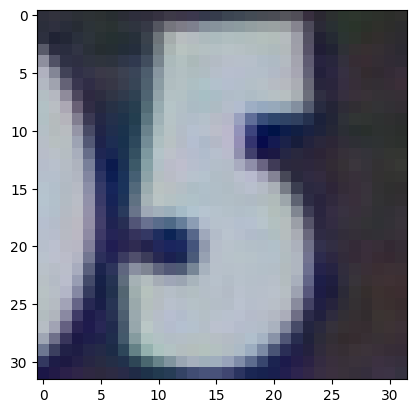

Number [5]


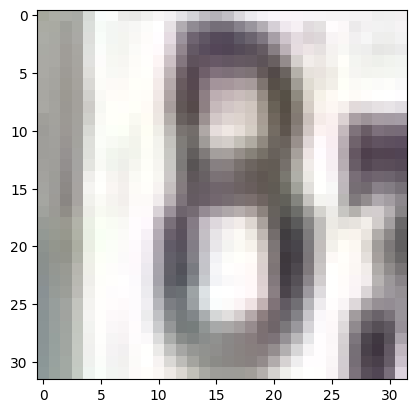

Number [8]


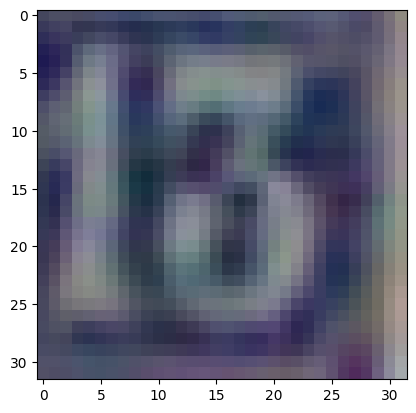

Number [3]


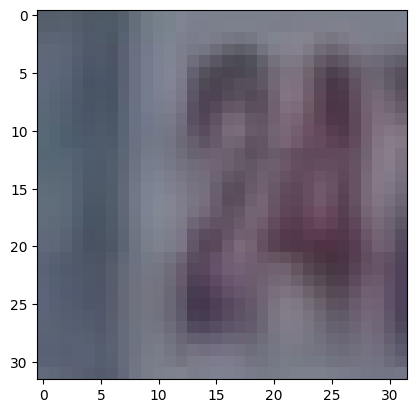

Number [2]


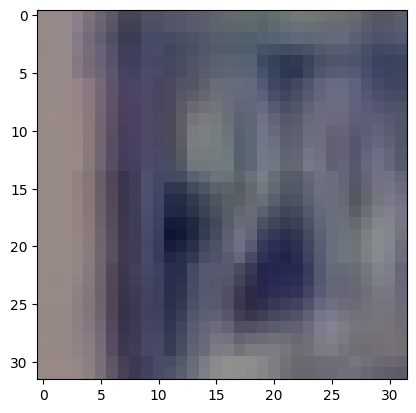

Number [2]


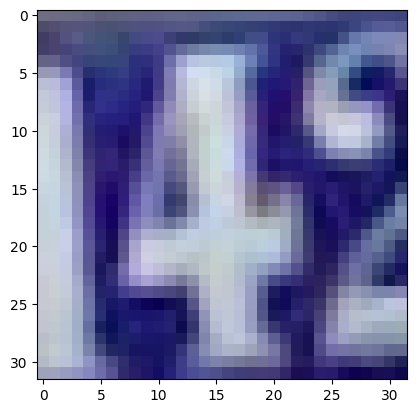

Number [4]


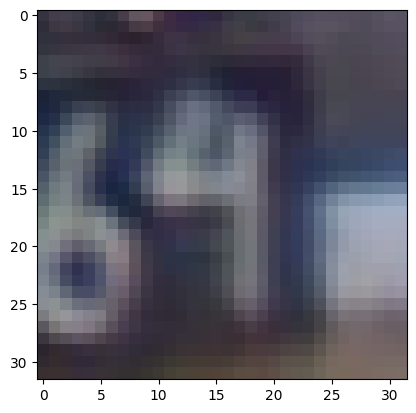

Number [4]


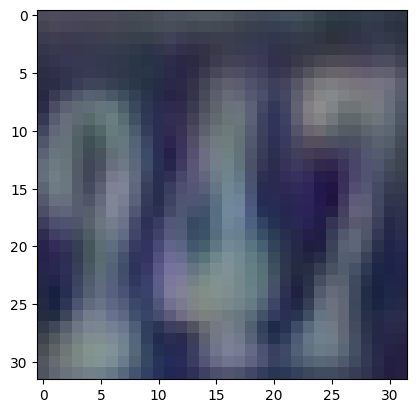

Number [4]


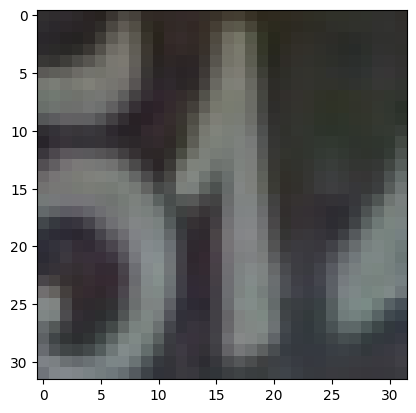

Number [1]


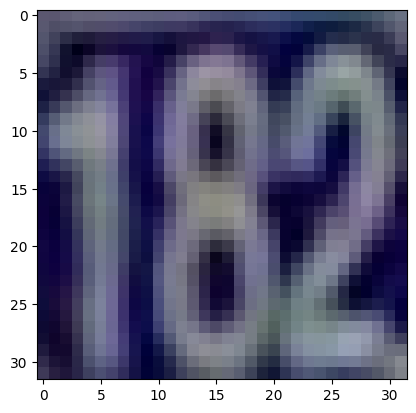

Number [8]


In [5]:
sample_number_list = random.sample(range(0,73257),10) 
for i in sample_number_list:     
    plt.imshow(X_train[i,:,:,:])     
    plt.show()     
    print('Number', y_train[i])

Here, I convert the images to greyscale using the `np.mean` function. This allows the image to be processed more easily, but is not necessarily required. Next, I normalize the array to values between 0 and 1 for easier processing as well.


In [6]:
X_train_grey = np.mean(X_train, 3).reshape(73257, 32, 32,1)/255
X_test_grey = np.mean(X_test, 3).reshape(26032, 32, 32,1)/255
X_train_plt = np.mean(X_train, 3)

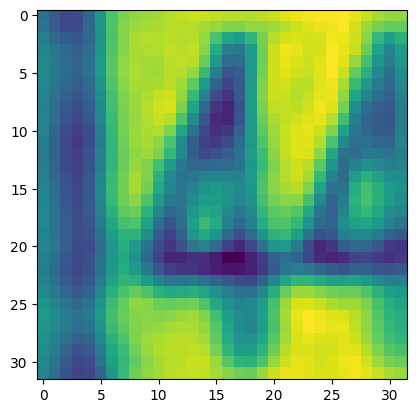

Number [4]


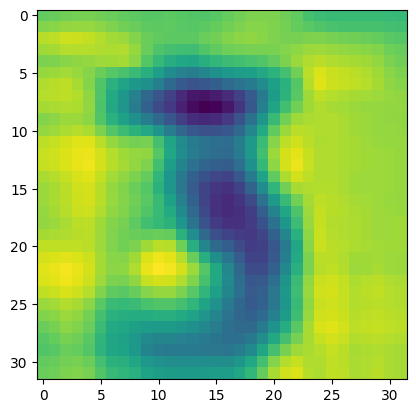

Number [3]


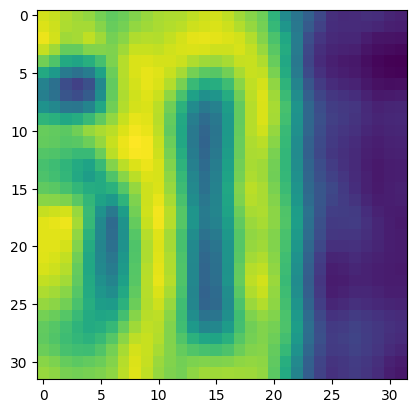

Number [1]


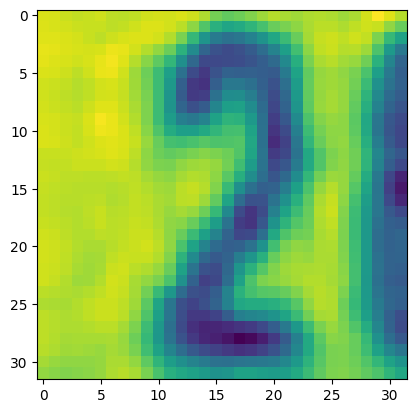

Number [2]


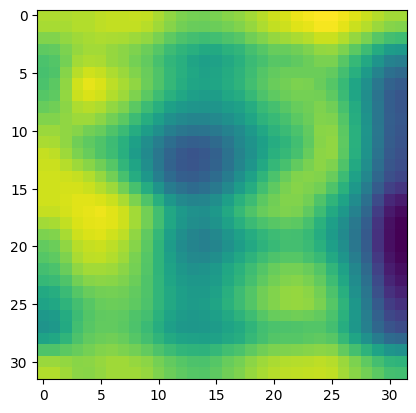

Number [6]


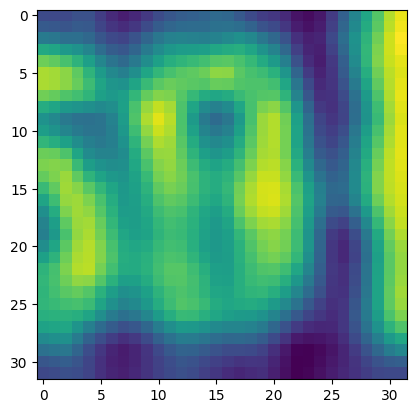

Number [10]


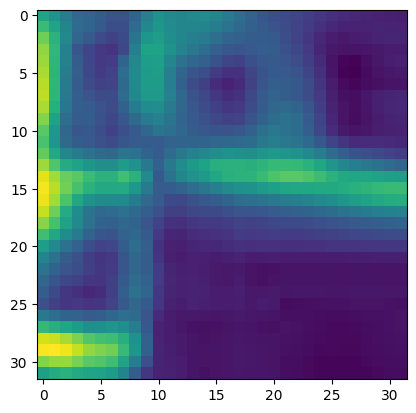

Number [4]


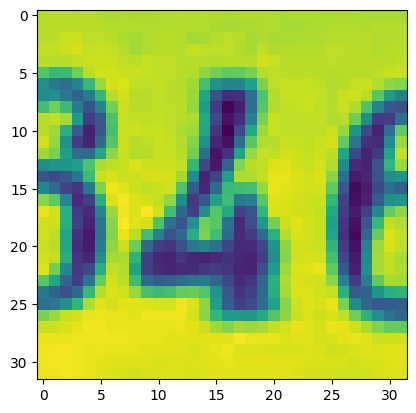

Number [4]


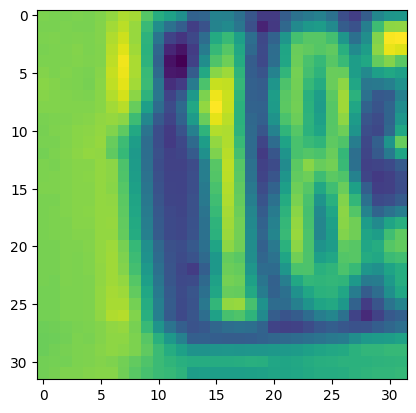

Number [1]


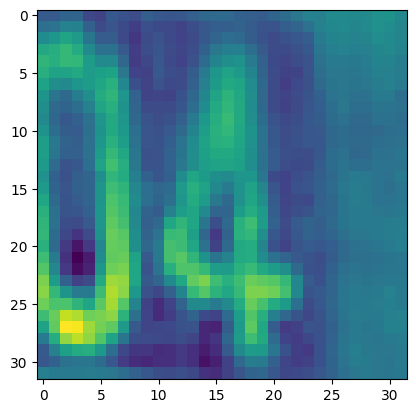

Number [4]


In [7]:
sample_number_list = random.sample(range(0,73257),10) 
for i in sample_number_list:     
    plt.imshow(X_train_grey[i,:,:,0])     
    plt.show()     
    print('Number', y_train[i])

The OneHotEncoder function converts categorical features as noted in `y_train` and `y_test` to an array.

In [8]:
encoder=OneHotEncoder().fit(y_train)
y_train_encoded = encoder.transform(y_train).toarray()
y_test_encoded = encoder.transform(y_test).toarray()

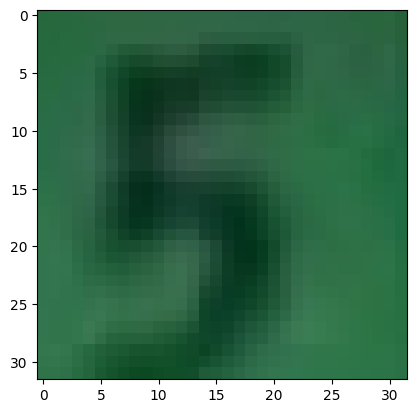

In [9]:
plt.imshow(X_test[0])

## 2. MLP neural network classifier
Now I can create my model! Throughout the next code blocks, I:
* Define basic callbacks: ModelCheckpoint and EarlyStopping
* Define my model - this basic one features 3 hidden dense layers and an output layer using the softmax activation function
* Compile my model using the Adam optimizer, calculating loss through categorical crossentropy and using accuracy as the metric for optimization
* Train my model in 20 epochs, with a batch size of 128

In [10]:
best_val_acc_path = 'best_val_acc/checkpoint'
best_val_acc = ModelCheckpoint(filepath = best_val_acc_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max')
earlystopping = EarlyStopping(patience = 3, monitor='loss')

model_1 = Sequential([
    Flatten(input_shape=X_train[0].shape),
    Dense(512, activation = 'relu', ),
    Dense(128, activation = 'relu'),
    Dense(128, activation='relu'),
    Dense(10, activation ='softmax')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,656,842
Trainable params: 1,656,842
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train_encoded, epochs=20, validation_data = (X_test, y_test_encoded), callbacks=[best_val_acc, earlystopping], batch_size=128)

Epoch 1/20
573/573 [==============================] - 8s 9ms/step - loss: 34.7351 - accuracy: 0.1283 - val_loss: 3.7419 - val_accuracy: 0.0934
Epoch 2/20
573/573 [==============================] - 3s 6ms/step - loss: 3.0972 - accuracy: 0.1584 - val_loss: 2.3574 - val_accuracy: 0.2086
Epoch 3/20
573/573 [==============================] - 3s 6ms/step - loss: 2.1423 - accuracy: 0.2657 - val_loss: 1.9906 - val_accuracy: 0.3607
Epoch 4/20
573/573 [==============================] - 3s 6ms/step - loss: 1.8538 - accuracy: 0.3845 - val_loss: 1.8163 - val_accuracy: 0.4165
Epoch 5/20
573/573 [==============================] - 3s 5ms/step - loss: 1.6627 - accuracy: 0.4550 - val_loss: 1.7018 - val_accuracy: 0.4537
Epoch 6/20
573/573 [==============================] - 3s 5ms/step - loss: 1.5134 - accuracy: 0.5083 - val_loss: 1.6143 - val_accuracy: 0.5047
Epoch 7/20
573/573 [==============================] - 2s 4ms/step - loss: 1.4765 - accuracy: 0.5264 - val_loss: 1.6633 - val_accuracy: 0.4974
Epoch

Now that my model is trained, lets compare it to the validation set. It is important to check for overfitting, as the model will hypothetically be used in real-world scenarios.

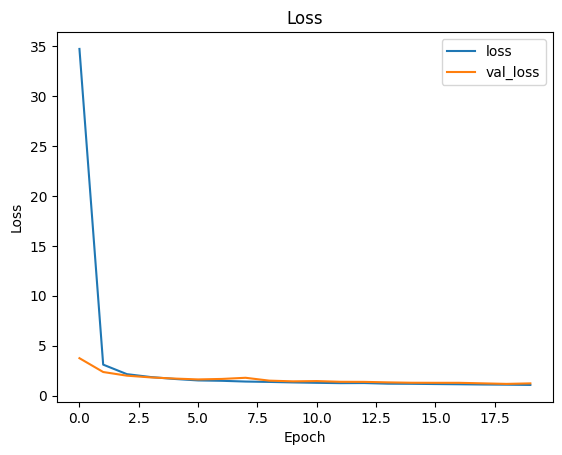

In [12]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

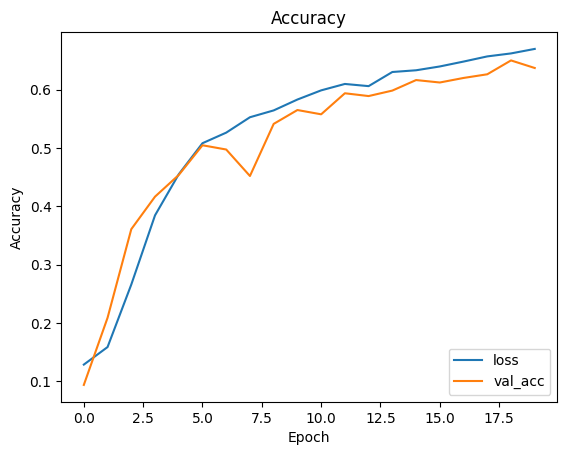

In [13]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['loss','val_acc'], loc='lower right')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Overall, not too bad, but we can do better!

## 3. CNN neural network classifier
I previously used a multi-layer perceptron to make predictions, but realistically, convolutional neural networks (CNNs) should be used in scenarios such as this one. We will do the same thing as before, but use CNNs instead. Note the usage of Conv2D, Maxpool2D, BatchNormalization, and Dropout in this model. The latter two are used as a method to prevent overfitting, while the former two are key parts of CNNs.

In [14]:
best_val_acc_path_2='CNN/best'
best_val_acc=ModelCheckpoint(filepath = best_val_acc_path_2, save_best_only=True, monitor='val_accuracy', save_weights_only=True, mode='max')
earlystopping = EarlyStopping(monitor='loss', patience=5, verbose=1)

model_2 = Sequential([
    Conv2D(filters= 16, kernel_size= 3, activation='relu', input_shape=X_train[0].shape),
    MaxPool2D(pool_size= (3,3)),
    Conv2D(filters= 32, kernel_size = 3, padding='valid', activation='relu'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    BatchNormalization(),
    Conv2D(filters= 32, kernel_size = 3, padding='valid', strides=2, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 32)         128       
 ormalization)                                                   
                                                      

In [15]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train_encoded, callbacks=[best_val_acc, earlystopping], epochs=20, validation_data=(X_test, y_test_encoded), batch_size=128)

Epoch 1/20
573/573 [==============================] - 8s 8ms/step - loss: 1.6032 - accuracy: 0.4375 - val_loss: 0.9126 - val_accuracy: 0.7243
Epoch 2/20
573/573 [==============================] - 4s 7ms/step - loss: 1.0272 - accuracy: 0.6582 - val_loss: 0.7938 - val_accuracy: 0.7738
Epoch 3/20
573/573 [==============================] - 4s 7ms/step - loss: 0.8944 - accuracy: 0.7072 - val_loss: 0.8072 - val_accuracy: 0.7567
Epoch 4/20
573/573 [==============================] - 4s 7ms/step - loss: 0.8338 - accuracy: 0.7282 - val_loss: 0.6628 - val_accuracy: 0.8022
Epoch 5/20
573/573 [==============================] - 4s 7ms/step - loss: 0.7929 - accuracy: 0.7431 - val_loss: 0.6592 - val_accuracy: 0.8005
Epoch 6/20
573/573 [==============================] - 4s 7ms/step - loss: 0.7650 - accuracy: 0.7542 - val_loss: 0.6912 - val_accuracy: 0.8033
Epoch 7/20
573/573 [==============================] - 4s 8ms/step - loss: 0.7392 - accuracy: 0.7643 - val_loss: 0.7413 - val_accuracy: 0.7929
Epoch 

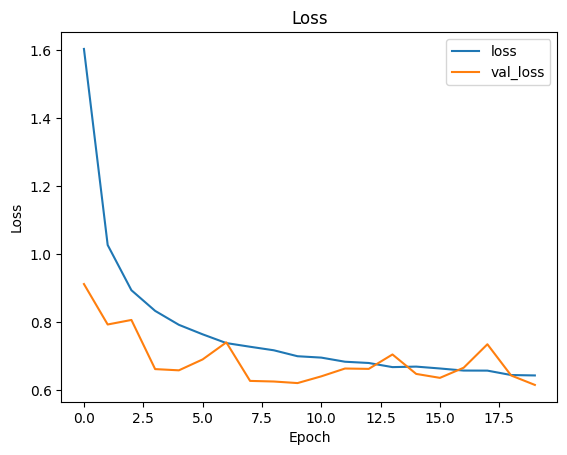

In [16]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

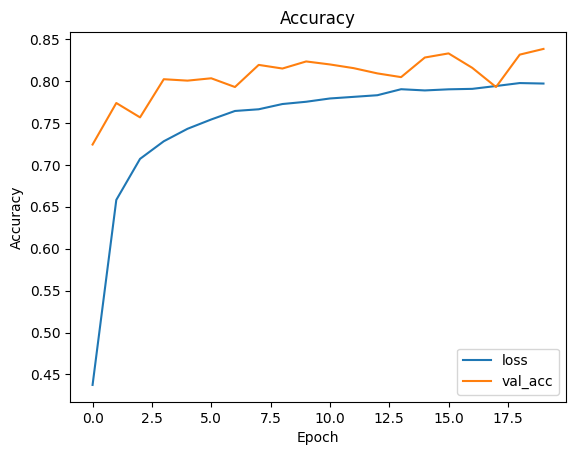

In [17]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.legend(['loss','val_acc'], loc='lower right')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Note that the CNN achieved higher accuracy while having significantly less parameters than the MLP.


## 4. Get model predictions
Let's see what the network is doing! In this section, I load the best weights in both models and
pit them against 5 randomly chosen image samples. I then plot the model's predictions to see
how confident it is in its response.

In [18]:
model_1.load_weights(best_val_acc_path)

1/1 [==============================] - 0s 93ms/step


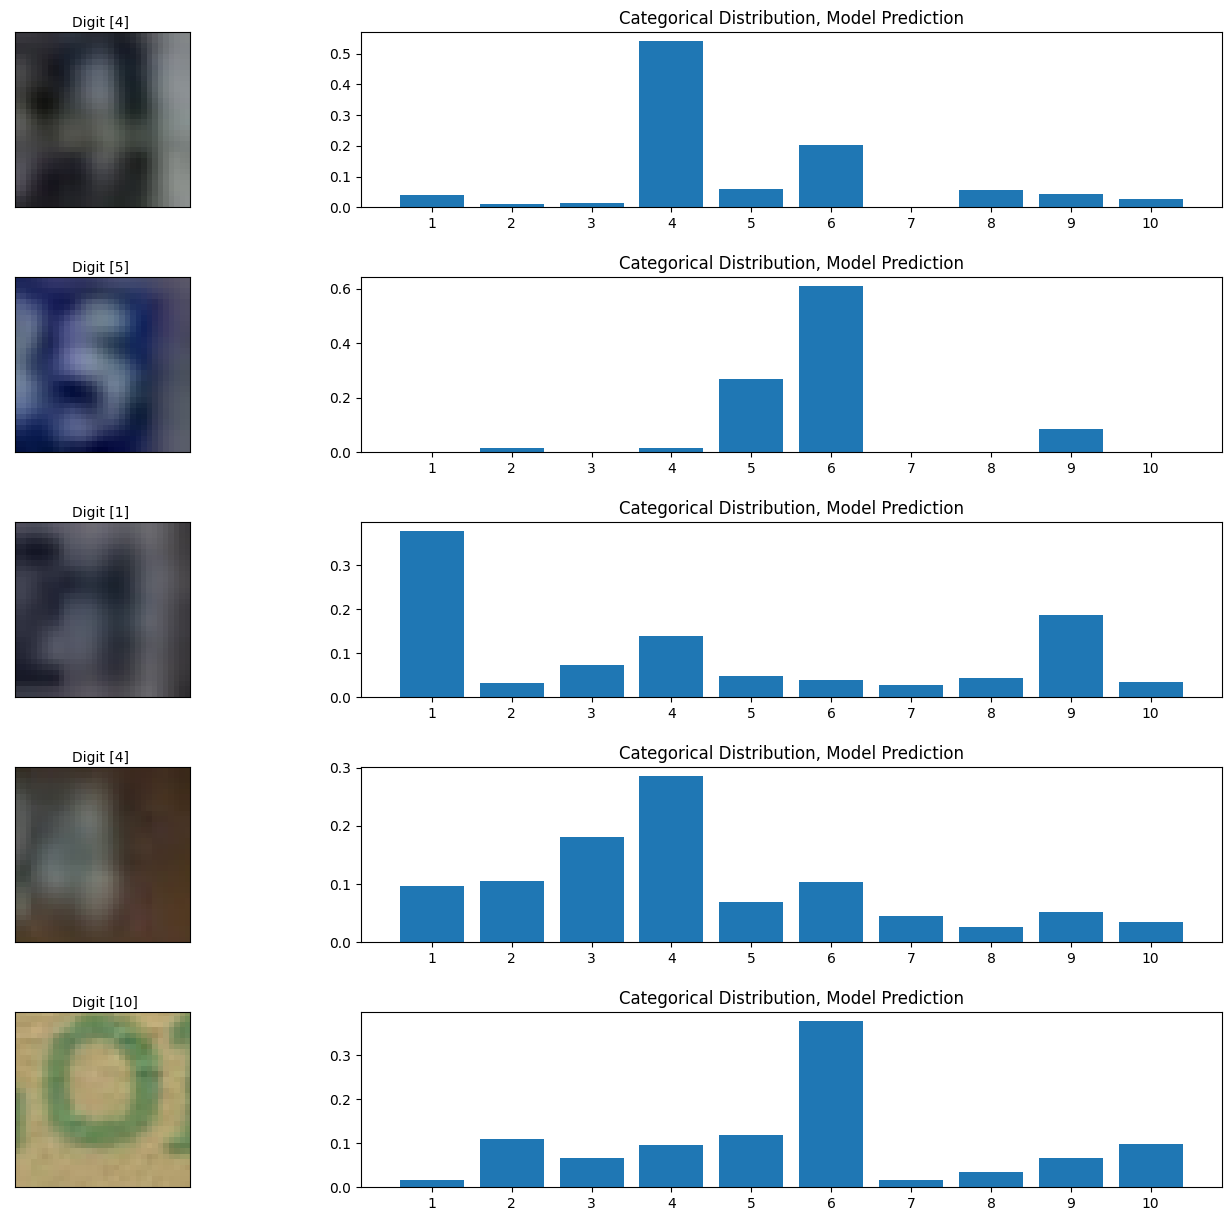

In [19]:
test_image = X_test.shape[0]

random1 = np.random.choice(test_image, 5)
random_test_image = X_test[random1, ...]
random_test_target = y_test[random1, ...]
prediction = model_1.predict(random_test_image)

graph, axes = plt.subplots(5, 2, figsize=(20, 15))
graph.subplots_adjust(hspace=0.4, wspace=-0.2)

for n, (predict, image, label) in enumerate(zip(prediction, random_test_image, random_test_target)):
    axes[n,0].imshow(np.squeeze(image))
    axes[n,0].get_xaxis().set_visible(False)
    axes[n,0].get_yaxis().set_visible(False)
    axes[n,0].text(10., -1.5, f'Digit {label}')
    axes[n,1].bar(np.arange(1,11), predict)
    axes[n,1].set_xticks(np.arange(1,11))
    axes[n,1].set_title("Categorical Distribution, Model Prediction")
plt.show()


In [20]:
model_2.load_weights(best_val_acc_path_2)

1/1 [==============================] - 0s 155ms/step


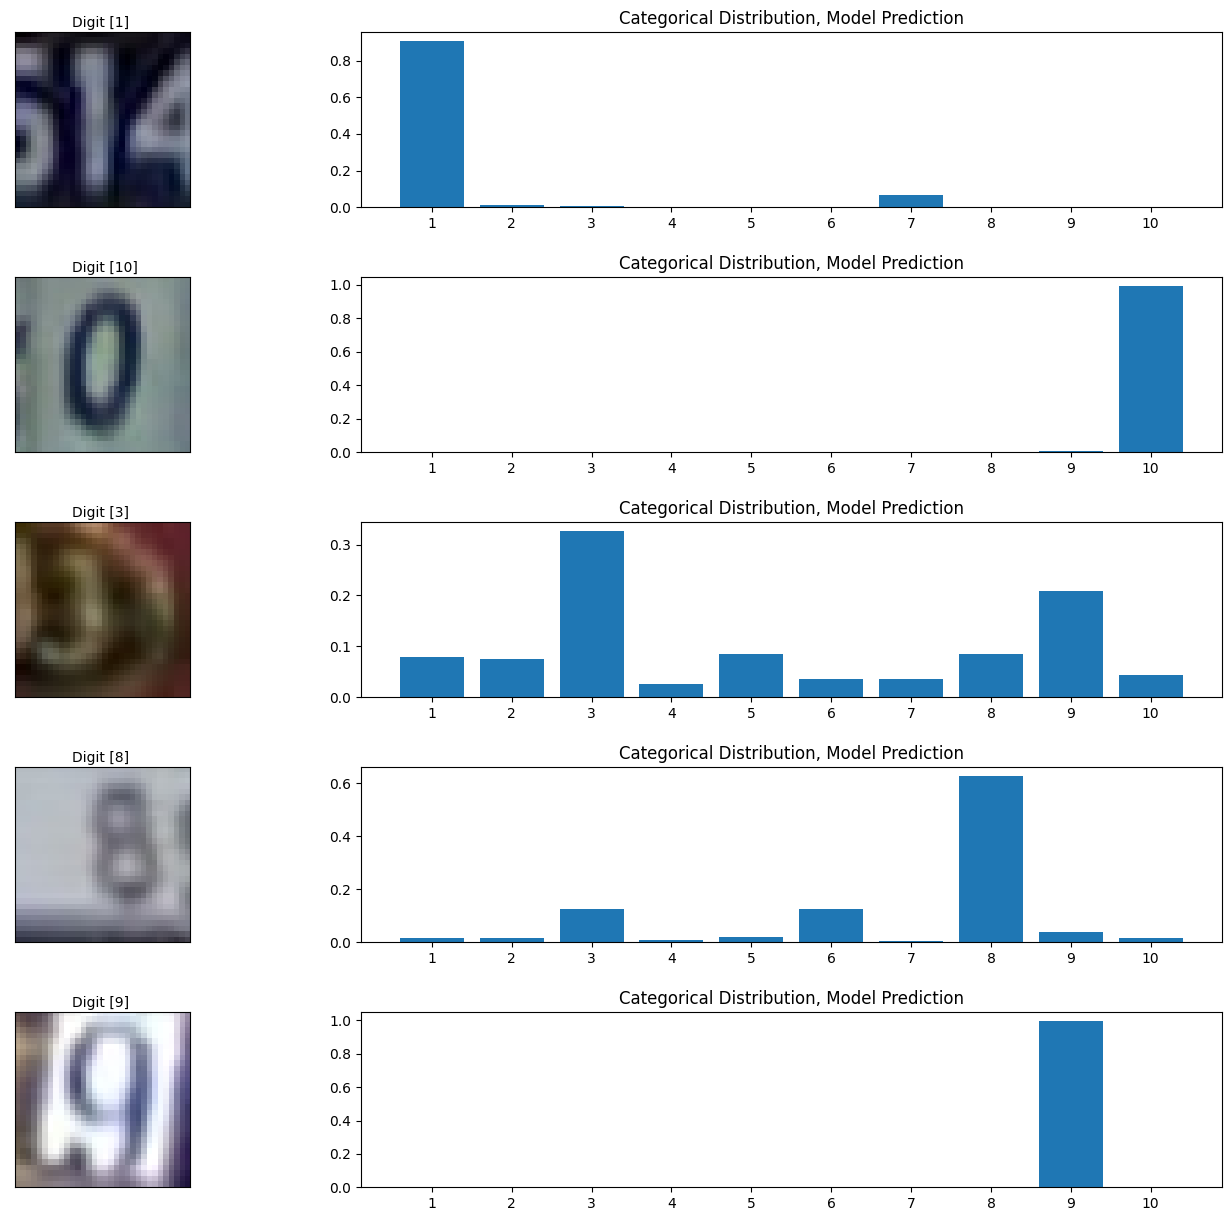

In [21]:
test_image = X_test.shape[0]

random1 = np.random.choice(test_image, 5)
random_test_image = X_test[random1, ...]
random_test_target = y_test[random1, ...]
prediction = model_2.predict(random_test_image)

graph, axes = plt.subplots(5, 2, figsize=(20, 15))
graph.subplots_adjust(hspace=0.4, wspace=-0.2)

for n, (predict, image, label) in enumerate(zip(prediction, random_test_image, random_test_target)):
    axes[n,0].imshow(np.squeeze(image))
    axes[n,0].get_xaxis().set_visible(False)
    axes[n,0].get_yaxis().set_visible(False)
    axes[n,0].text(10., -1.5, f'Digit {label}')
    axes[n,1].bar(np.arange(1,11), predict)
    axes[n,1].set_xticks(np.arange(1,11))
    axes[n,1].set_title("Categorical Distribution, Model Prediction")
plt.show()


Note the higher confidence of the CNN as apposed to the MLP!

Through this notebook, I have compared MLPs and CNNs against each other under the SVHN dataset. It can be concluded that CNNs are much stronger than MLPs when it comes to computer vision, which is why they are the most popular method for static image analysis.